# Домашнее задание "Теория оптимизации"

Проведите вычислительные эксперимент - для заданной функции Растригина найдите среднее и минимальное значение целевой функции по результатам 100 экспериментов, а также среднее число итераций при случайных начальных условиях в диапазон [-5;5]. Эксперимент выполнить для размерностей d = 2 и 4.

Определение функции:

$f(\mathbf{x})=A n+\sum_{i=1}^{n}\left[x_{i}^{2}-A \cos \left(2 \pi x_{i}\right)\right]$

где A = 10 и $x_{i} \in[-5.12,5.12]$. Глобальный минимум в точке x = 0, $f(\mathbf{x})=0$.

Результаты представьте в виде сводной таблицы:

Среднее значение целевой функции.................d=2 | d=4

Минимальное найденное значение целевой функции...d=2 | d=4

Среднее число итераций...........................d=2 | d=4

In [52]:
import numpy as np
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pandas as pd

In [53]:
def rosenbrock(x):
    return np.sum(100. * (x[1:] - x[:-1]**2.)**2. + (1 - x[:-1])**2., axis=0)

In [54]:
def rastring(x):
    n = len(x)
    res = 10 * n
    for i in range(n):
        res += x[i]**2 - 10 * np.cos(2 * np.pi * x[i])
    return res

<ipython-input-55-60bca5deebbf>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


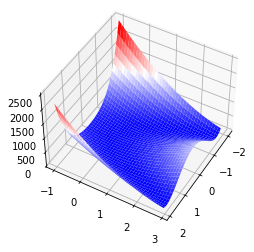

In [55]:
# Rosenbrock plot

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(np.array([X, Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()

<ipython-input-56-04592b1c6396>:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


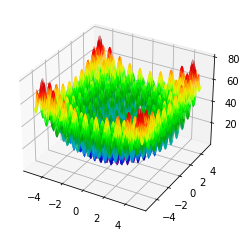

In [56]:
# Rastring plot

X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(X, Y)

Z = rastring(np.array([X, Y]))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)
plt.show()

In [57]:
x0= np.array([1.2, 0.7, 2.1])

In [58]:
res = minimize(rosenbrock, x0, method='nelder-mead', options={'xtol':1e-8,
                                                              'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 137
         Function evaluations: 246


In [59]:
res


 final_simplex: (array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.99999999, 0.99999999],
       [1.        , 1.        , 1.        ]]), array([1.39922360e-17, 3.04616828e-17, 6.67851364e-17, 7.70340718e-17]))
           fun: 1.3992235951184147e-17
       message: 'Optimization terminated successfully.'
          nfev: 246
           nit: 137
        status: 0
       success: True
             x: array([1., 1., 1.])

In [60]:
x0 = np.random.uniform(low=0,high=2,size=(3,))


In [61]:
x0

array([1.28615321, 0.93438705, 1.29567643])

In [62]:
itList_d2 = []
itList_d4 = []
resList_d2 = []
resList_d4 = []

for kk in range (100):
    x0_d2 = np.random.uniform(low=0,high=2,size=(2,))
    x0_d4 = np.random.uniform(low=0,high=2,size=(4,))

    res_d2 = minimize(rastring, x0_d2, method='nelder-mead', options={'xtol':1e-8,
                                                              'disp':False})
    res_d4 = minimize(rastring, x0_d4, method='nelder-mead', options={'xtol':1e-8,
                                                              'disp':False})
    itList_d2.append(res_d2.nit)
    itList_d4.append(res_d4.nit)

    resList_d2.append(res_d2.x)
    resList_d4.append(res_d4.x)

In [63]:
# Рисуем таблицу
idxs = ['Среднее значение целевой функции',
        'Минимальное найденное значение целевой функции',
        'Среднее число итераций']

cols = ['d=2', 'd=4']
result = pd.DataFrame(index=idxs, columns=cols)

In [64]:
result.iloc[0] = (np.mean(resList_d2), np.mean(resList_d4))
result.iloc[1] = (np.min(resList_d2), np.min(resList_d4))
result.iloc[2] = (np.mean(itList_d2), np.mean(itList_d4))

In [65]:
result


,d=2,d=4
Среднее значение целевой функции,1.074554,1.047193
Минимальное найденное значение целевой функции,-0.0,-0.0
Среднее число итераций,63.85,192.11
